## Seasonality detection

In this notebook, we will do FFT on stock price and oil price.

In [34]:
#Import libraries
import numpy as np
import pandas as pd
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl

In [35]:
#Load data
stock = pd.read_csv('AALStock_processed.csv')

In [36]:
#Extract closing price
x = stock['Close'].tolist()
print(x)

[46.3, 46.7, 45.89, 46.21, 47.08, 48.48, 48.64, 48.1, 47.65, 46.75, 47.64, 47.26, 48.0, 46.94, 47.54, 47.91, 49.59, 46.95, 44.9, 44.25, 44.05, 44.01, 44.2, 45.3, 45.17, 45.06, 46.3, 46.45, 47.41, 46.57, 47.54, 46.97, 46.91, 46.81, 46.32, 46.1, 46.28, 46.32, 46.36, 47.09, 45.72, 46.82, 45.31, 44.84, 44.89, 43.33, 43.9, 42.37, 41.21, 42.09, 42.13, 41.72, 41.7, 40.42, 40.35, 41.41, 41.73, 41.74, 42.6, 41.96, 42.54, 42.3, 42.45, 40.9, 41.31, 41.72, 41.81, 42.32, 43.93, 43.96, 43.35, 44.23, 43.81, 44.4, 45.22, 45.15, 46.44, 46.61, 46.4, 43.98, 42.62, 42.08, 43.87, 43.92, 43.91, 44.51, 44.94, 47.08, 47.3, 46.54, 45.83, 46.68, 46.94, 44.92, 44.65, 45.22, 46.21, 46.66, 46.77, 48.02, 48.74, 47.96, 48.41, 49.05, 49.52, 49.74, 49.74, 50.86, 51.43, 50.27, 49.48, 49.45, 49.39, 49.11, 48.79, 49.66, 48.03, 48.43, 48.97, 48.63, 48.78, 48.5, 49.25, 49.62, 50.32, 50.39, 51.26, 52.05, 53.03, 52.66, 51.61, 53.8, 53.81, 54.22, 53.87, 53.15, 52.61, 52.34, 51.91, 51.28, 50.61, 51.01, 50.0, 50.49, 50.44, 51.0

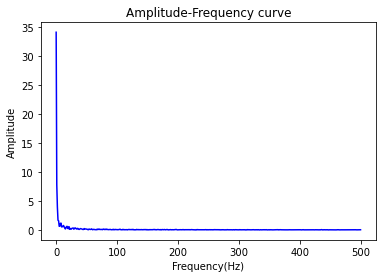

In [37]:
fft_x = fft(x) #Fast Fourier Transform
n = len(x)  #Number of samples, also the number of frequencies
y = np.arange(n)  #Frequency list
abs_x = np.abs(fft_x)   #The result of fourier transform is a complex number, so we need to take the absolute value
norm_x = abs_x/n   #Normalization
half_y = y[range(int(n/2))]   #Due to the Nyquist's thereom, we only accept half of the frequencies
norm_half_x = norm_x[range(int(n/2))] 
plt.figure()
plt.plot(half_y,norm_half_x,'b')
plt.title('Amplitude-Frequency curve')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')
plt.show()

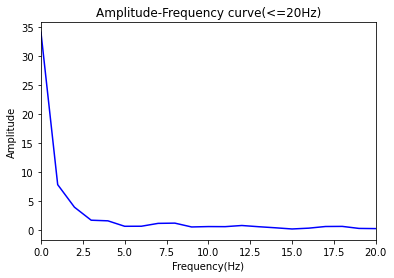

In [38]:
#Show the part with first 20 frequencies
plt.figure()
half_y = y[range(int(n/2))]
norm_half_x = norm_x[range(int(n/2))] 
plt.plot(half_y,norm_half_x,'b')
plt.xlim([0,20])
plt.title('Amplitude-Frequency curve(<=20Hz)')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')
plt.show()

The frequency curve hardly demonstrates any seasonality, but that might be caused by the unexpected pandemic, so we need to do it again with only the data before pandemic

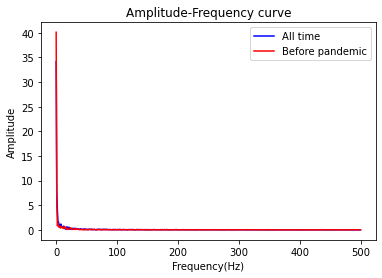

In [44]:
x1 = x[0:770]
fft_x1 = fft(x1) #Fast Fourier Transform
n1 = len(x1)  #Length
abs_x1 = np.abs(fft_x1)  #Take absolute value
norm_x1 = abs_x1/n1   #Normalization
norm_half_x1 = norm_x1[range(int(n/2))] 
plt.figure()
plt.plot(half_y,norm_half_x,'b',label='All time')
plt.plot(half_y,norm_half_x1,'r',label='Before pandemic')
plt.title('Amplitude-Frequency curve')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

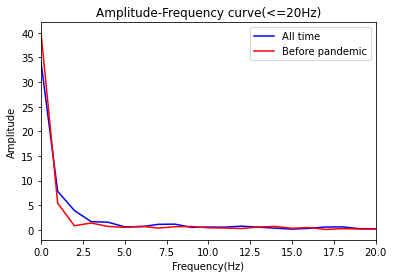

In [46]:
#Show the part with first 20 frequencies
plt.figure()
plt.plot(half_y,norm_half_x,'b',label='All time')
plt.plot(half_y,norm_half_x1,'r',label='Before pandemic')
plt.title('Amplitude-Frequency curve(<=20Hz)')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim([0,20])
plt.show()

Similar analysis can be done on oil

In [56]:
# Load data
oil = pd.read_csv('Oil_processed.csv')
print(oil)

            Date  Close   Open   High    Low   Volume Up/Down
0     2020-12-31  48.52  48.35  48.58  47.77  181.89K   0.25%
1     2020-12-30  48.40  48.13  48.66  47.61  266.96K   0.83%
2     2020-12-29  48.00  47.72  48.35  47.68  213.78K   0.80%
3     2020-12-28  47.62  48.23  48.96  47.50  238.46K  -1.26%
4     2020-12-24  48.23  48.09  48.62  47.56  167.39K   0.23%
...          ...    ...    ...    ...    ...      ...     ...
1048  2017-01-06  53.99  53.73  54.32  53.32  528.33K   0.43%
1049  2017-01-05  53.76  53.39  54.12  52.79  517.36K   0.94%
1050  2017-01-04  53.26  52.49  53.43  52.15  512.64K   1.78%
1051  2017-01-03  52.33  54.20  55.24  52.11  727.79K  -3.15%
1052  2017-01-02  54.03  54.09  54.18  54.01        -   0.58%

[1053 rows x 7 columns]


In [58]:
#Extract closing price
x = oil['Close'].tolist()
x.reverse() # sorted by Time sequence
print(x)

[54.03, 52.33, 53.26, 53.76, 53.99, 51.96, 50.82, 52.25, 53.01, 52.37, 52.45, 52.52, 52.48, 51.08, 51.37, 52.42, 52.75, 53.18, 52.75, 53.78, 53.17, 52.63, 52.81, 53.88, 53.54, 53.83, 53.01, 52.17, 52.34, 53.0, 53.86, 52.93, 53.2, 53.11, 53.36, 53.4, 53.79, 53.97, 54.06, 53.59, 54.45, 53.99, 54.05, 54.01, 53.83, 52.61, 53.33, 53.2, 53.14, 50.28, 49.28, 48.49, 48.4, 47.72, 48.86, 48.75, 48.78, 48.22, 47.34, 48.04, 47.7, 47.97, 47.73, 48.37, 49.51, 50.35, 50.6, 50.24, 51.03, 51.15, 51.7, 52.24, 53.08, 53.4, 53.11, 53.18, 52.65, 52.41, 50.44, 50.27, 49.62, 49.23, 49.56, 49.62, 48.97, 49.33, 48.84, 47.66, 47.82, 45.52, 46.22, 46.43, 45.88, 47.33, 47.83, 47.84, 48.85, 48.66, 49.07, 49.35, 50.33, 50.73, 51.47, 51.36, 48.9, 49.8, 49.94, 49.97, 49.66, 48.32, 48.36, 47.66, 47.4, 48.19, 45.72, 45.64, 45.83, 46.08, 46.46, 44.73, 44.46, 44.74, 44.2, 43.23, 42.53, 42.74, 43.01, 43.38, 44.24, 44.74, 44.93, 46.04, 47.07, 47.13, 45.13, 45.52, 44.23, 44.4, 45.04, 45.49, 46.08, 46.54, 46.02, 46.4, 47.12,

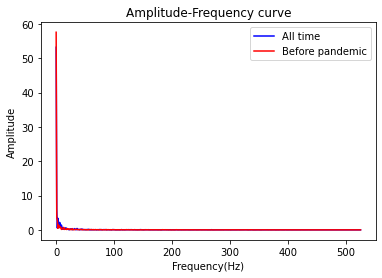

In [60]:
fft_x = fft(x) #Fast Fourier Transform
n = len(x)  #Number of samples, also the number of frequencies
y = np.arange(n)  #Frequency list
abs_x = np.abs(fft_x)   #The result of fourier transform is a complex number, so we need to take the absolute value
norm_x = abs_x/n   #Normalization
half_y = y[range(int(n/2))]   #Due to the Nyquist's thereom, we only accept half of the frequencies
norm_half_x = norm_x[range(int(n/2))] 
x1 = x[0:814]
fft_x1 = fft(x1) #Fast Fourier Transform
n1 = len(x1)  #Length
abs_x1 = np.abs(fft_x1)  #Take absolute value
norm_x1 = abs_x1/n1   #Normalization
norm_half_x1 = norm_x1[range(int(n/2))] 
plt.figure()
plt.plot(half_y,norm_half_x,'b',label='All time')
plt.plot(half_y,norm_half_x1,'r',label='Before pandemic')
plt.title('Amplitude-Frequency curve')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

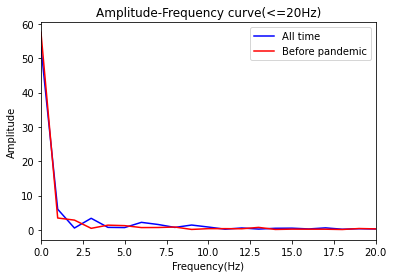

In [62]:
plt.figure()
plt.plot(half_y,norm_half_x,'b',label='All time')
plt.plot(half_y,norm_half_x1,'r',label='Before pandemic')
plt.title('Amplitude-Frequency curve(<=20Hz)')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim([0,20])
plt.show()